## Superfast Matrix Algorithm on Image Compression

In [2]:
!pip install tqdm

You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
# https://github.com/deep-diver/CIFAR10-img-classification-tensorflow/blob/master/CIFAR10_image_classification.ipynb
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm 
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DownloadProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

""" 
    check if the data (zip) file is already downloaded
    if not, download it from "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz" and save as cifar-10-python.tar.gz
"""
if not isfile('cifar-10-python.tar.gz'):
    with DownloadProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [5]:

def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 24 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name: airplane


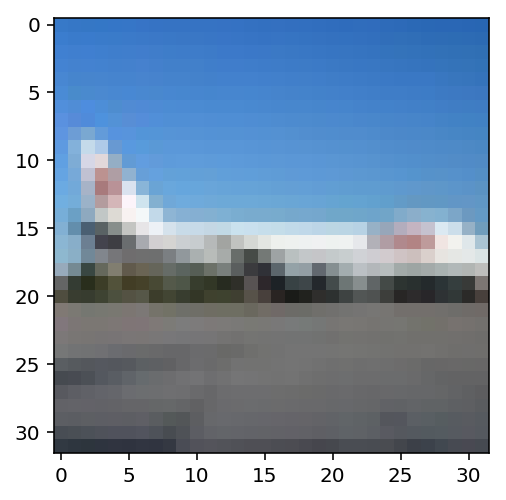

In [6]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 7000
display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Play with images

(32, 32, 3)


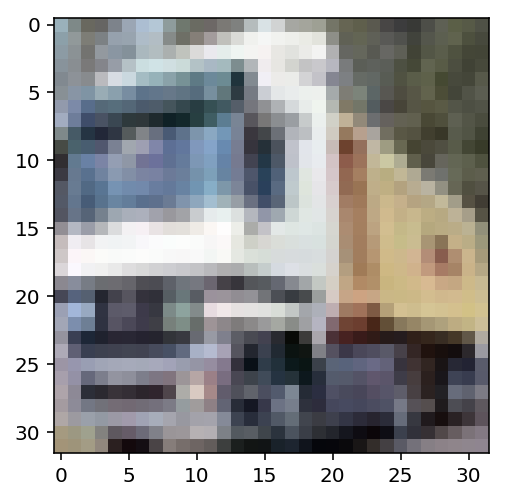

In [17]:
cifar10_dataset_folder_path = 'cifar-10-batches-py'
batch_id = 1
sample_id = 1
features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
sample_image = features[sample_id]
sample_label = labels[sample_id]
print(sample_image.shape)
plt.imshow(sample_image)

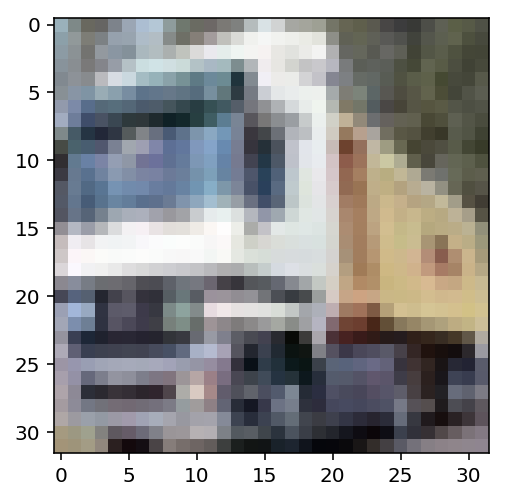

In [18]:
import matplotlib
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
img = rgb2gray(sample_image)
# print(sample_image.dtype)
# plt.imshow(sample_image)
# img = sample_image.reshape([len(sample_image), -1])
img = np.hstack([sample_image[:, :, k] for k in range(3)])

def genImgShow(img):
    img_show = np.empty(sample_image.shape)
    img_show[:, :, 0] = img[:, :32]
    img_show[:, :, 1] = img[:, 32:64]
    img_show[:, :, 2] = img[:, 64:96]
    return img_show.astype(np.uint8)

img_show = genImgShow(img)
plt.imshow(img_show)
# plt.imshow(img.reshape(sample_image.shape))
# plt.imshow(img)

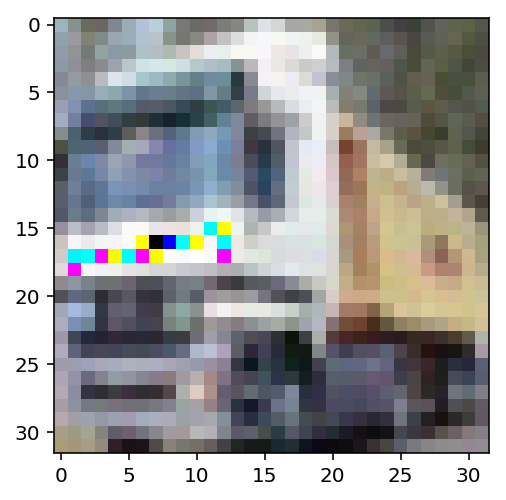

In [19]:
# Add gaussian noise to the image
uBound = 10
img += np.random.randint(0, uBound, size=img.shape).astype(np.uint8)
plt.imshow(genImgShow(img))

Singular values: [7702.328 1238.619 1171.865  936.589  752.036  678.492  589.525  571.78
  455.672  381.38   334.2    275.146  265.139  249.947  214.327  208.786
  192.786  166.564  158.707  137.415  107.503   91.484   86.283   71.914
   66.544   52.286   50.265   41.53    36.449   30.6     23.576   21.202]
relative error: 1.0
CUR error: 25.992489789856382
Sampling LRA error: 2.2465634391559894
Gaussian LRA error: 2.726039227370967


Text(0.5,1,'Gaussian Multiplier')

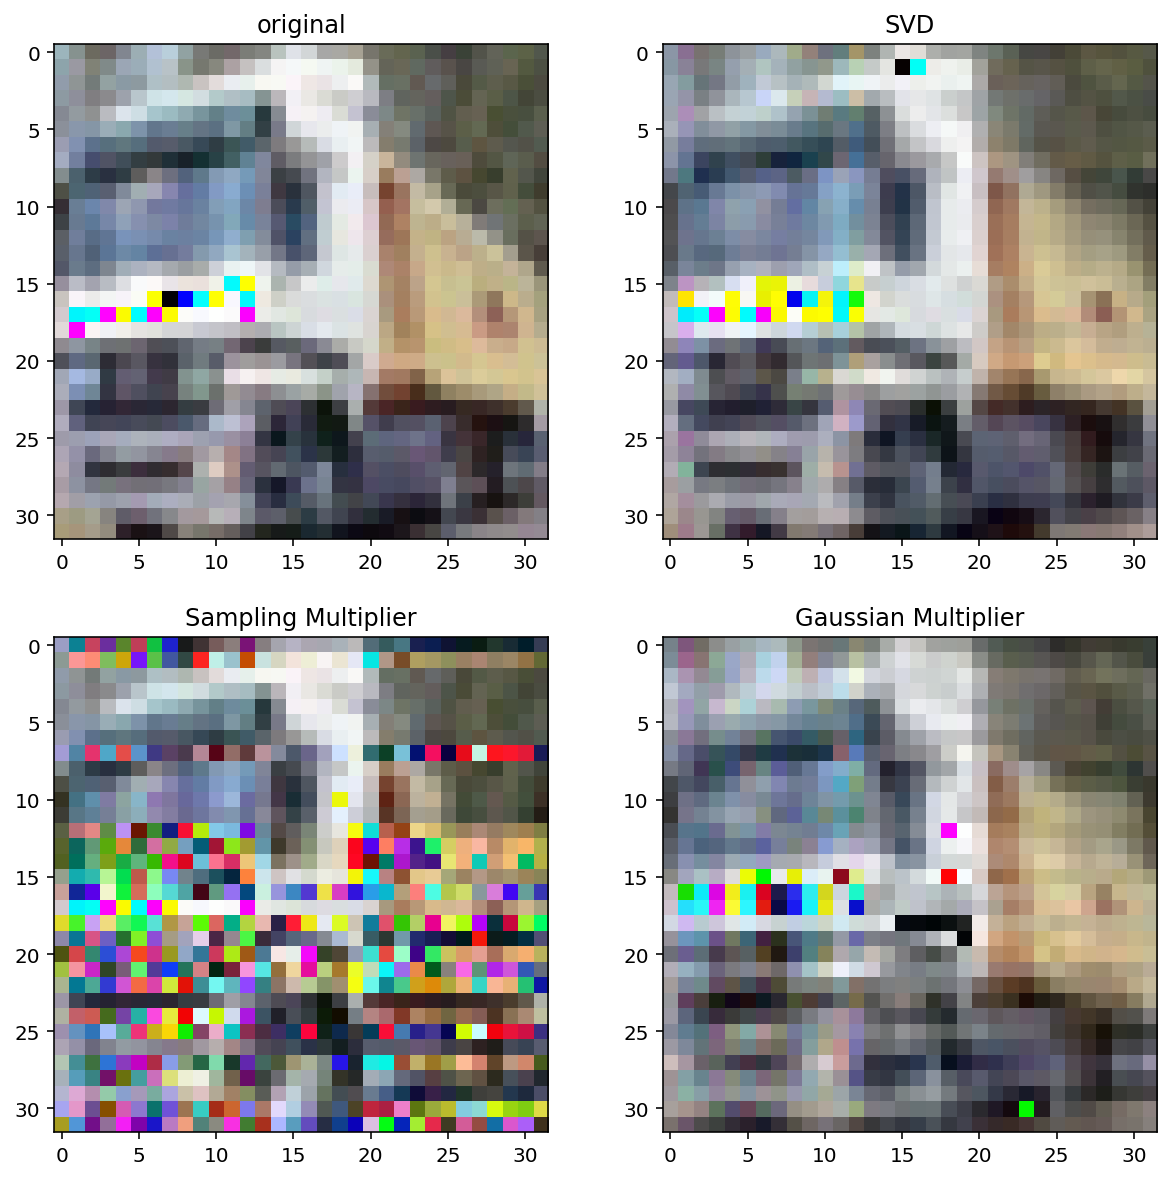

In [20]:
U, S, V = np.linalg.svd(img)
r = 10
Ur = U[:, :r]
Sigmar = np.diag(S[:r])
Vr = V[:r, :]
imgr = Ur.dot(Sigmar).dot(Vr)
np.set_printoptions(precision=3, suppress=True)
print("Singular values:", S)
print("relative error:", np.linalg.norm(img - imgr, ord=2)/S[r])
# CUR with random sampled rows and columns
row_ind = np.random.choice(np.arange(len(img)), r, replace=False)
col_ind = np.random.choice(np.arange(len(img[0])), r, replace=False)
C = img[:, col_ind]
R = img[row_ind, :]
U = img[np.ix_(row_ind, col_ind)]
imgCUR = C.dot(np.linalg.pinv(U)).dot(R)
print("CUR error:", np.linalg.norm(img - imgCUR, ord=2)/S[r])
# LRA via Sampling

col_ind = np.random.choice(np.arange(len(img[0])), r, replace=False)
M = img[:, col_ind]
Q, _ = np.linalg.qr(M)
Qr = Q[:, :r]
imgSampling = Qr.dot(Qr.T).dot(img)
print("Sampling LRA error:", np.linalg.norm(img - imgSampling, ord=2)/S[r])
# Gaussian multiplier
# M = np.random.randn(32, 32).dot(img)
M = img.dot(np.random.randn(96, 96))
Q, R = np.linalg.qr(M)
# print(Q.shape, R.shape)
Qr = Q[:, :r]
imgLRA = Qr.dot(Qr.T).dot(img)
print("Gaussian LRA error:", np.linalg.norm(img - imgLRA, ord=2)/S[r])


plt.figure(figsize=(10, 10))
ax = plt.subplot(221)
ax.imshow(genImgShow(img))
ax.set_title("original")
ax = plt.subplot(222)
ax.imshow(genImgShow(imgr))
ax.set_title("SVD")
ax = plt.subplot(223)
ax.imshow(genImgShow(imgCUR))
ax.set_title("Sampling Multiplier")
ax = plt.subplot(224)
ax.imshow(genImgShow(imgLRA))
ax.set_title("Gaussian Multiplier")

Singular values: [7452.078 1337.568  572.498  511.766  319.064  270.614  254.997  143.318
  130.338  106.852   89.707   78.29    50.508   45.955   41.832   30.137
   26.478   22.931   21.089   17.888   15.657   14.869   12.128    9.532
    8.851    7.697    7.121    4.52     4.054    2.942    2.884    2.031]
relative error: 0.9999999999999991
CUR error: 5.507275404908616


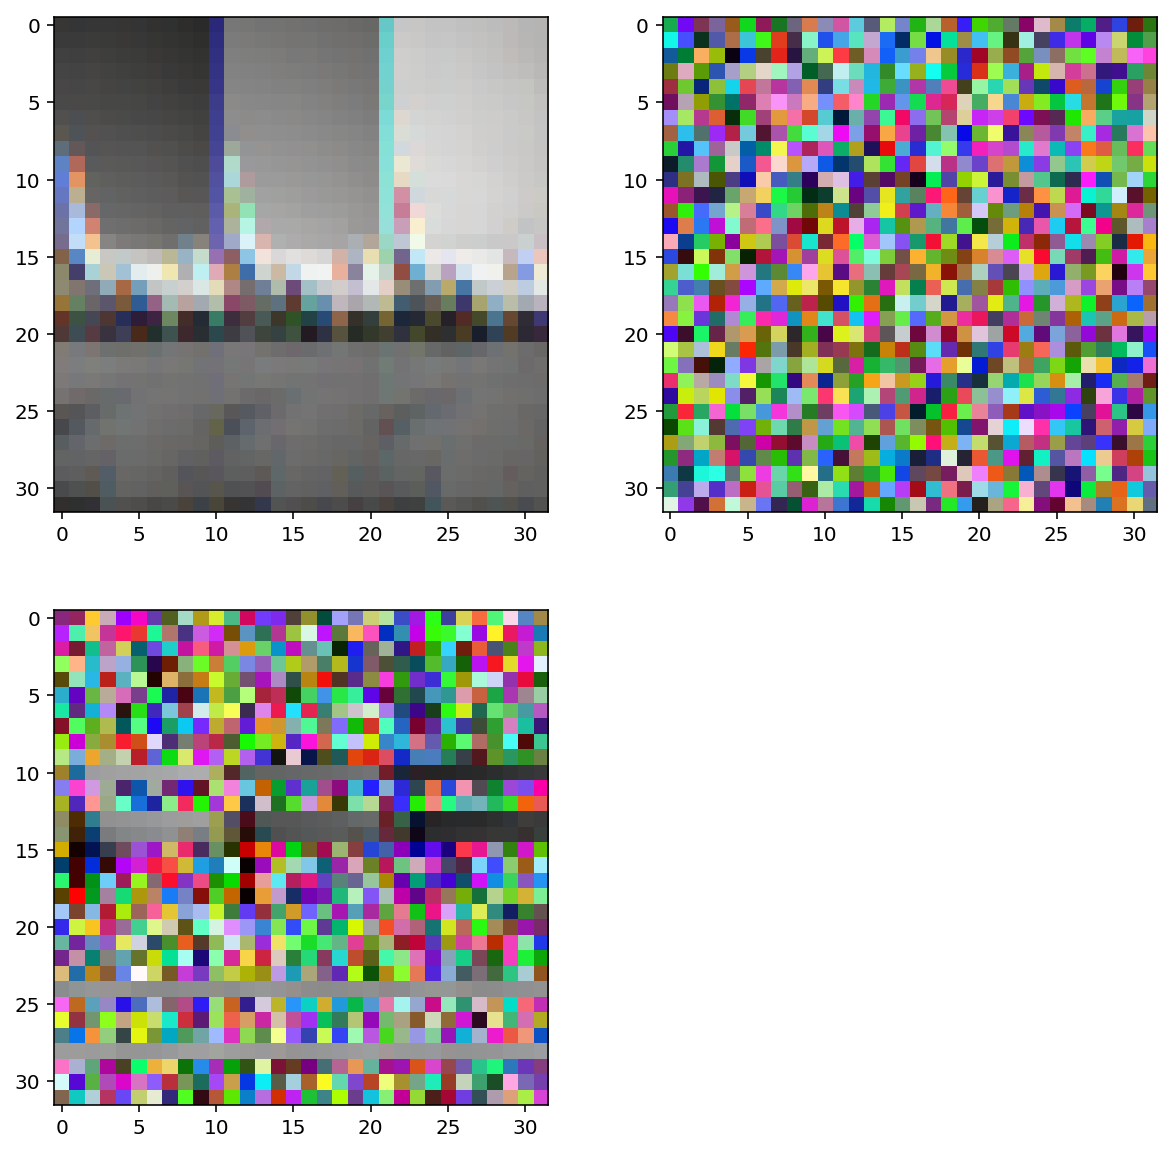

In [114]:
# U, S, V = np.linalg.svd(img)
# r = 5
# Ur = U[:, :r]
# Sigmar = np.diag(S[:r])
# Vr = V[:r, :]
# imgr = Ur.dot(Sigmar).dot(Vr)
# np.set_printoptions(precision=3, suppress=True)
# print("Singular values:", S)
# print("relative error:", np.linalg.norm(img - imgr, ord=2)/S[r])
# # CUR with random sampled rows and columns
# row_ind = np.random.choice(np.arange(len(img)), r, replace=False)
# col_ind = np.random.choice(np.arange(len(img[0])), r, replace=False)
# C = img[:, col_ind]
# R = img[row_ind, :]
# U = img[np.ix_(row_ind, col_ind)]
# imgCUR = C.dot(np.linalg.pinv(U)).dot(R)
# print("CUR error:", np.linalg.norm(img - imgCUR, ord=2)/S[r])

# def imshow2(img):
    
#     img_show = img.reshape([-1])
#     img_show = np.maximum(img_show, 0)
#     img_show = np.minimum(img_show, 255)
#     img_show = img_show.reshape(sample_image.shape)
#     plt.imshow(img_show)

# plt.figure(figsize=(10, 10))
# plt.subplot(221)
# imshow(img)
# plt.subplot(222)
# imshow2(imgr)
# plt.subplot(223)
# imshow2(imgCUR)

In [84]:
np.maximum([1,2,3], 100)

array([100, 100, 100])

In [9]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [10]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [11]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):
    features = normalize(features)
    labels = one_hot_encode(labels)

    pickle.dump((features, labels), open(filename, 'wb'))


def preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode):
    n_batches = 5
    valid_features = []
    valid_labels = []

    for batch_i in range(1, n_batches + 1):
        features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_i)
        
        # find index to be the point as validation data in the whole dataset of the batch (10%)
        index_of_validation = int(len(features) * 0.1)

        # preprocess the 90% of the whole dataset of the batch
        # - normalize the features
        # - one_hot_encode the lables
        # - save in a new file named, "preprocess_batch_" + batch_number
        # - each file for each batch
        _preprocess_and_save(normalize, one_hot_encode,
                             features[:-index_of_validation], labels[:-index_of_validation], 
                             'preprocess_batch_' + str(batch_i) + '.p')

        # unlike the training dataset, validation dataset will be added through all batch dataset
        # - take 10% of the whold dataset of the batch
        # - add them into a list of
        #   - valid_features
        #   - valid_labels
        valid_features.extend(features[-index_of_validation:])
        valid_labels.extend(labels[-index_of_validation:])

    # preprocess the all stacked validation dataset
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(valid_features), np.array(valid_labels),
                         'preprocess_validation.p')

    # load the test dataset
    with open(cifar10_dataset_folder_path + '/test_batch', mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    # preprocess the testing data
    test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

    # Preprocess and Save all testing data
    _preprocess_and_save(normalize, one_hot_encode,
                         np.array(test_features), np.array(test_labels),
                         'preprocess_training.p')

In [12]:
preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [13]:
import pickle

valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Test: cross approximation
- add a Gaussian noise to the matrix
- perform CUR
- subtract the Gaussian noise